## Machine learning

> ### XGBoost Algorithm
 
> * XGBoost stands for eXtreme Gradient Boosting
  * It is an open-sourced tool
  * A variant of the gradient boosting machine
  * Tree-based model
  * Use for structure data(table data)
  * Use for both regression and classification problems

> ### What makes XGBoost popular?

> * Speed and performance – faster than other ensemble classifiers.
  * Core algorithm is parallelizable – Can harness the power of multi-core computers.
  * Consistently outperforms other algorithm methods
  * Wide variety of tuning parameters- e.g Cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc

> *The primary author of the model and the c++ implementation is Tianqi Chen. 
     The author for the R-package is Tong He.*


### Basic Idea about Boosting Algorithm

![image](output1.png "Title")


> Four classifiers (in 4 boxes), shown above, are trying to classify + and - classes as homogeneously as possible.

* 1. **Box 1**: The first classifier (usually a decision stump) creates a vertical line (split) at D1. It says anything to the left of D1 is + and anything to the right of D1 is -. However, this classifier misclassifies three + points.

* 2. **Box 2**: The second classifier gives more weight to the three + misclassified points (see the bigger size of +) and creates a vertical line at D2. Again it says, anything to the right of D2 is - and left is +. Still, it makes mistakes by incorrectly classifying three - points.

* 3. **Box 3**: Again, the third classifier gives more weight to the three - misclassified points and creates a horizontal line at D3. Still, this classifier fails to classify the points (in the circles) correctly.

* 4. **Box 4**: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.

*Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.*



> **XGBoost** uses the default base learners tree ensembles. The tree ensemble model is a set of classification and regression trees (CART).
Trees are grown one after another ,and attempts to reduce the misclassification rate are made in subsequent iterations.

> The basic idea behind **`boosting algorithms`** is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it


> To begin with XGBoost, you should know about the default base learners of XGBoost: **tree ensembles**. The tree ensemble model is a set of classification and regression trees (CART). Trees are grown one after another, and attempts to reduce the misclassification rate are made in subsequent iterations.

### Example using XGBoost algorithm to determine the median value of owner-occupied homes per $1000s.

In [38]:
from sklearn.datasets import load_boston
boston = load_boston()

The boston variable itself is a dictionary, so you can check for its keys using the .keys() method.

In [39]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


You can easily check for its shape by using the boston.data.shape attribute, which will return the size of the dataset.

In [40]:
print(boston.data.shape)

(506, 13)


As you can see it returned (506, 13), that means there are 506 rows of data with 13 columns. Now, if you want to know what the 13 columns are, you can simply use the .feature_names attribute and it will return the feature names.

In [41]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The description of the dataset is available in the dataset itself. You can take a look at it using .DESCR.

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let’s convert it into a pandas DataFrame! For that you need to import the pandas library and call the DataFrame() function passing the argument boston.data. To label the names of the columns, use the .columnns attribute of the pandas DataFrame and assign it to boston.feature_names.

In [75]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [43]:
#Explore the top 5 rows of the dataset by using head() method on your pandas DataFrame.

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


You'll notice that there is no column called PRICE in the DataFrame. This is because the target column is available in another attribute called boston.target. Append boston.target to your pandas DataFrame.

In [44]:
data['PRICE'] = boston.target

Run the .info() method on your DataFrame to get useful information about the data.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


>Turns out that this dataset has 14 columns (including the target variable PRICE) and 506 rows. Notice that the columns are of float data-type indicating the presence of only continuous features with no missing values in any of the columns. To get more summary statistics of the different features in the dataset you will use the describe() method on your DataFrame.

>Note that describe() only gives summary statistics of columns which are continuous in nature and not categorical.

In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


>If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. Also, if you have some missing values such as NA in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally. You can check out this link if you wish to know more on this.

>Without delving into more exploratory analysis and feature engineering, you will now focus on applying the algorithm to train the model on this data.

>You will build the model using Trees as base learners (which are the default base learners) using XGBoost's scikit-learn compatible API. Along the way, you will also learn some of the common tuning parameters which XGBoost provides in order to improve the model's performance, and using the root mean squared error (RMSE) performance metric to check the performance of the trained model on the test set. `Root mean Squared error` is the square root of the mean of the squared differences between the actual and the predicted values. As usual, you start by importing the library xgboost and other important libraries that you will be using for building the model.

>Note you can install python libraries like xgboost on your system using pip install xgboost on cmd.

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Separate the target variable and rest of the variables using .iloc to subset the data.

In [77]:
# Separate the target variable "PRICE" as dependent variable "y"
# Independent variables as X
X, y = data.iloc[:,:-1],data.iloc[:,-1] 

In [60]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

Now you will convert the dataset into an optimized data structure called **Dmatrix** that XGBoost supports and gives it acclaimed performance and efficiency gains. You will use this later in the tutorial.

In [78]:
# Changing the data to a form XGBOOST supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

### XGBoost's hyperparameters
> At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost and you can read all about them here. But the most common ones that you should know are:

* learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
* max_depth: determines how deeply each tree is allowed to grow during any boosting round.
* subsample: percentage of samples used per tree. Low value can lead to underfitting.
* colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
* n_estimators: number of trees you want to build.
* objective: determines the loss function to be used like reg:linear for regression problemsreg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

> XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

* gamma: controls whether a given node will split based on the expected reduction in loss after the * split. A higher value leads to fewer splits. Supported only for tree-based learners.
* alpha: L1 regularization on leaf weights. A large value leads to more regularization.
* lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

> It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree (default),gblinear or dart.

> Now, you will create the train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the XGBClassifier() class.

In [81]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.

In [82]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

Compute the **rmse** by invoking the **mean_sqaured_error** function from sklearn's metrics module.

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.455243


Well, you can see that your RMSE for the price prediction came out to be around 10.8 per 1000$.

### k-fold Cross Validation using XGBoost
In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

* num_boost_round: denotes the number of trees you build (analogous to n_estimators)
* metrics: tells the evaluation metrics to be watched during CV
* as_pandas: to return the results in a pandas DataFrame.
* early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
* seed: for reproducibility of results.
This time you will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here you are using the Dmatrix object you created before.

In [68]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results contains train and test RMSE metrics for each boosting round.

In [69]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750760,0.036153,21.765523,0.028850
1,19.778531,0.077650,19.830760,0.031760
2,18.052810,0.118631,18.157337,0.116038
3,16.458958,0.169187,16.623975,0.191413
4,15.074782,0.183546,15.254608,0.213612


Extract and print the final boosting round metric.

In [70]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64


You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$. You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

### Visualize Boosting Trees and Feature Importance

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

In [84]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

Plotting the first tree with the matplotlib library:

In [72]:
!pip install graphviz

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

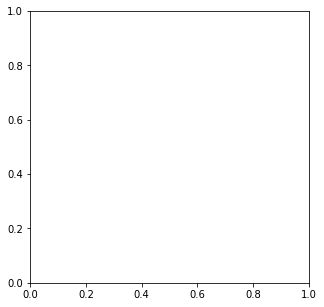

In [85]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.

Note that if the above plot throws the 'graphviz' error on your system, consider installing the graphviz package via pip install graphviz on cmd. You may also need to run sudo apt-get install graphviz on cmd. (link)

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

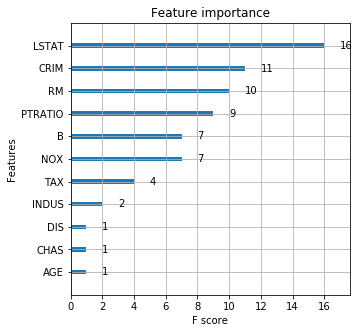

In [74]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

As you can see the feature RM has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection. Isn't this brilliant?

### Conclusion
You have reached the end of this tutorial. I hope this might have or will help you in some way or the other. You started off with understanding how Boosting works in general and then narrowed down to XGBoost specifically. You also practiced applying XGBoost on an open source dataset and along the way you learned about its hyper-parameters, doing cross-validation, visualizing the trees and in the end how it can also be used as a Feature Selection technique. Whoa!! that's something for starters, but there is so much to explore in XGBoost that it can't be covered in a single tutorial. If you would like to learn more, be sure to take a look at our Extreme Gradient Boosting with XGBoost course on DataCamp.